In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
facebook_df = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')

C:\Users\I. OGHENEMARHO\AppData\Local\Temp\ipykernel_5108\1525594632.py:1: DtypeWarning: Columns (10,11,12,13,15,16,18,19,21,22,23,24,26,45,46,51,52,62,63,64,65,69,71,73,78,80,82,83,85,93,95,97,98,99,100,102,104,105,106,108,110,111,113,115,116,117,118,119,121,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  facebook_df = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')


In [3]:
facebook_df.shape

(9803, 147)

In [4]:
facebook_df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content',
       ...
       'Video Removed from Playlists', 'Annotation Impressions',
       'Annotation Clickable Impressions', 'Annotation Closable Impressions',
       'Annotation Closes', 'Card Impressions', 'Card Teaser Impressions',
       'Card Teaser Clicks', 'Poll Votes', 'Tags'],
      dtype='object', length=147)

In [5]:
#check duplicates
if facebook_df.duplicated().any():
    print('There are duplicates in dataframe.')
else:
    print('There are no duplicates in the Dataframe')
    

There are no duplicates in the Dataframe


In [6]:
#calculate sum of empty columns
facebook_df.isnull().sum()/len(facebook_df)*100

Date                         0.000000
Post ID                      0.000000
Network                      0.000000
Post Type                    0.000000
Content Type                 0.000000
                              ...    
Card Impressions           100.000000
Card Teaser Impressions    100.000000
Card Teaser Clicks         100.000000
Poll Votes                 100.000000
Tags                        83.668265
Length: 147, dtype: float64

In [7]:
threshold = 0.8 * len(facebook_df)
empty_column=facebook_df.columns[facebook_df.isnull().sum()>threshold]
facebook_df.drop(empty_column,axis=1,inplace=True)

In [8]:
facebook_df.shape

(9803, 57)

In [9]:
facebook_df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Viral Impressions', 'Non-viral Impressions',
       'Paid Impressions', 'Fan Impressions', 'Fan Organic Impressions',
       'Fan Paid Impressions', 'Non-fan Impressions',
       'Non-fan Organic Impressions', 'Non-fan Paid Impressions', 'Reach',
       'Organic Reach', 'Viral Reach', 'Non-viral Reach', 'Paid Reach',
       'Fan Reach', 'Fan Paid Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Love Reactions', 'Haha Reactions', 'Wow Reactions', 'Sad Reactions',
       'Angry Reactions', 'Comments', 'Shares', 'Click-Through Rate',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Photo View Clicks',
       'Answers', 'Negative Feedback', 'Engaged Users', 'Engaged Fans',
       'Users Talking About This', 'Unique Reactions', 'Unique 

In [10]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              9803 non-null   object 
 1   Post ID                           9803 non-null   object 
 2   Network                           9803 non-null   object 
 3   Post Type                         9803 non-null   object 
 4   Content Type                      9803 non-null   object 
 5   Profile                           9803 non-null   object 
 6   Sent by                           9803 non-null   object 
 7   Link                              9803 non-null   object 
 8   Post                              9553 non-null   object 
 9   Linked Content                    9462 non-null   object 
 10  Impressions                       8893 non-null   object 
 11  Organic Impressions               8893 non-null   object 
 12  Viral 

In [11]:
facebook_df.head(5)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,...,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
0,12/17/2022 5:08 pm,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",https://www.facebook.com/StanbicIBTC/videos/53...,...,51,231,177,53.0,2.0,0.0,587,NaN,577,13.0
1,5/4/2019 10:01 am,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,https://www.facebook.com/StanbicIBTC/photos/a....,...,"3,360","1,166",762,413.0,47.0,0.0,"3,412",931,"2,896",10.0
2,6/2/2020 9:00 pm,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,https://www.facebook.com/StanbicIBTC/photos/a....,...,"2,033",834,446,423.0,28.0,0.0,"1,948",713,"1,470",5.0
3,5/9/2022 10:37 am,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,https://www.facebook.com/StanbicIBTC/photos/a....,...,43,110,100,9.0,2.0,0.0,290,23,275,1.0
4,7/18/2021 10:00 am,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",https://www.facebook.com/StanbicIBTC/photos/a....,...,"2,261","1,061",404,797.0,9.0,0.0,"2,570",124,"2,528",3.0


In [12]:
#create a column of the data we need for the analysis

column=['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Comments']

fb_new= facebook_df[column].copy()

In [13]:
fb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Date                              9803 non-null   object
 1   Post ID                           9803 non-null   object
 2   Network                           9803 non-null   object
 3   Post Type                         9803 non-null   object
 4   Content Type                      9803 non-null   object
 5   Profile                           9803 non-null   object
 6   Sent by                           9803 non-null   object
 7   Link                              9803 non-null   object
 8   Post                              9553 non-null   object
 9   Impressions                       8893 non-null   object
 10  Organic Impressions               8893 non-null   object
 11  Reach                             8893 non-null   object
 12  Organic Reach       

Change the object column to float for statistical analysis

In [14]:
# Create an empty dictionary to store the type value counts for each column
type_counts = {}

# Iterate through each column in the DataFrame
for column in fb_new.columns:
    # Apply the 'type' function to each element in the column and get the value counts
    column_type_counts = fb_new[column].apply(type).value_counts()
    
    # Store the result in the dictionary with the column name as the key
    type_counts[column] = column_type_counts

# Print the type value counts for each column
for column, counts in type_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()

Column: Date
<class 'str'>    9803
Name: Date, dtype: int64

Column: Post ID
<class 'str'>    9803
Name: Post ID, dtype: int64

Column: Network
<class 'str'>    9803
Name: Network, dtype: int64

Column: Post Type
<class 'str'>    9803
Name: Post Type, dtype: int64

Column: Content Type
<class 'str'>    9803
Name: Content Type, dtype: int64

Column: Profile
<class 'str'>    9803
Name: Profile, dtype: int64

Column: Sent by
<class 'str'>    9803
Name: Sent by, dtype: int64

Column: Link
<class 'str'>    9803
Name: Link, dtype: int64

Column: Post
<class 'str'>      9553
<class 'float'>     250
Name: Post, dtype: int64

Column: Impressions
<class 'str'>      8192
<class 'float'>    1611
Name: Impressions, dtype: int64

Column: Organic Impressions
<class 'str'>      8192
<class 'float'>    1611
Name: Organic Impressions, dtype: int64

Column: Reach
<class 'str'>      8192
<class 'float'>    1611
Name: Reach, dtype: int64

Column: Organic Reach
<class 'str'>      8192
<class 'float'>    161

In [15]:
column_to_convert=['Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagements', 'Reactions', 'Likes',
       'Comments','Engagement Rate (per Reach)','Engagement Rate (per Impression)']


In [16]:
def clean_and_convert_to_float(x):
    # If the value is a string, clean it and try to convert it to float
    if isinstance(x, str):
        # Remove single quotes and commas
        x = x.replace("'", '').replace(',', '')
        
        # Remove non-alphanumeric characters and spaces using a Pandas Series method
        x = pd.Series(x).str.replace(r'[^A-Za-z0-9\s.]+', '', regex=True).iloc[0]
        
        # Try to convert to float, and handle potential exceptions
        try:
            return float(x)
        except ValueError:
            return None  # or any other default value
    return x

In [17]:
fb_new[column_to_convert] = fb_new[column_to_convert].applymap(clean_and_convert_to_float)

In [18]:
fb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              9803 non-null   object 
 1   Post ID                           9803 non-null   object 
 2   Network                           9803 non-null   object 
 3   Post Type                         9803 non-null   object 
 4   Content Type                      9803 non-null   object 
 5   Profile                           9803 non-null   object 
 6   Sent by                           9803 non-null   object 
 7   Link                              9803 non-null   object 
 8   Post                              9553 non-null   object 
 9   Impressions                       8893 non-null   float64
 10  Organic Impressions               8893 non-null   float64
 11  Reach                             8893 non-null   float64
 12  Organi

In [19]:
na_column=['Impressions','Organic Impressions','Reach','Organic Reach','Engagement Rate (per Impression)',
         'Engagement Rate (per Reach)','Engagements','Reactions','Likes','Comments']

column_mean=fb_new[na_column].mean()

fb_new[na_column]=fb_new[na_column].fillna(column_mean)

In [20]:
fb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              9803 non-null   object 
 1   Post ID                           9803 non-null   object 
 2   Network                           9803 non-null   object 
 3   Post Type                         9803 non-null   object 
 4   Content Type                      9803 non-null   object 
 5   Profile                           9803 non-null   object 
 6   Sent by                           9803 non-null   object 
 7   Link                              9803 non-null   object 
 8   Post                              9553 non-null   object 
 9   Impressions                       9803 non-null   float64
 10  Organic Impressions               9803 non-null   float64
 11  Reach                             9803 non-null   float64
 12  Organi

In [21]:
fb_new['Date'] = pd.to_datetime(fb_new['Date'])

In [22]:
fb_new['Hour']=fb_new['Date'].apply(lambda time: time.hour)
fb_new['Month']=fb_new['Date'].apply(lambda time: time.month) #month the post
fb_new['Day of week']=fb_new['Date'].apply(lambda time: time.dayofweek)#Day of week the post

In [23]:
datemap = {0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
fb_new['Day of week'] = fb_new['Day of week'].map(datemap)

EDA

In [24]:
fb_new['Content Type'].unique()

array(['Video', 'Photo', 'Text', 'Link'], dtype=object)

In [25]:
fb_new['Content Type'].value_counts()

Photo    8308
Video     964
Text      339
Link      192
Name: Content Type, dtype: int64

In [26]:
fb_new['Sent by'].unique()

array(['Damilare Oyekanmi', ' ', 'Aramide Salami', 'Blessing Ubah',
       'Sophia Amuka', 'Kemi Amoo', 'Dunni Ogunsanya'], dtype=object)

In [27]:
fb_new['Sent by'].value_counts()

                     7090
Damilare Oyekanmi    1657
Aramide Salami        428
Blessing Ubah         328
Sophia Amuka          209
Kemi Amoo              48
Dunni Ogunsanya        43
Name: Sent by, dtype: int64

In [28]:
# Replace '' with 'SMM' in the 'Column_Name' column
fb_new['Sent by'] = fb_new['Sent by'].replace(' ', 'SMM')

In [29]:
fb_new['Sent by'].value_counts()

SMM                  7090
Damilare Oyekanmi    1657
Aramide Salami        428
Blessing Ubah         328
Sophia Amuka          209
Kemi Amoo              48
Dunni Ogunsanya        43
Name: Sent by, dtype: int64

In [31]:

value_counts = fb_new['Sent by'].value_counts()
total_count = len(fb_new['Sent by'])
percentage_distribution = (value_counts / total_count) * 100

# Print the percentage distribution
print(percentage_distribution)

SMM                  72.324799
Damilare Oyekanmi    16.902989
Aramide Salami        4.366010
Blessing Ubah         3.345915
Sophia Amuka          2.132000
Kemi Amoo             0.489646
Dunni Ogunsanya       0.438641
Name: Sent by, dtype: float64


In [33]:
engagement_summary = (fb_new.groupby('Content Type').agg({'Impressions' : 'mean', 'Organic Impressions':'mean',
       'Reach':'mean', 'Organic Reach':'mean',
       'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean'}).sort_values(by ='Engagements', ascending = False))

engagement_summary.columns = ['Avg Impressions','Avg Organic Impressions','Avg Reach','Avg Organic Reach',
                              'Avg Engagement','Avg Reaction','Avg Likes','Avg comments']



In [34]:
engagement_summary

,Avg Impressions,Avg Organic Impressions,Avg Reach,Avg Organic Reach,Avg Engagement,Avg Reaction,Avg Likes,Avg comments
Content Type,,,,,,,,
Text,7215.718028,7201.579563,6726.767236,6722.812519,354.332528,69.055361,66.362669,44.679880
Photo,6199.495492,6128.066976,5493.582687,5455.843191,235.944569,98.480102,95.708498,20.491135
Link,4873.828476,4821.319029,4257.588144,4227.492962,196.452901,85.395443,82.003303,16.644773
Video,2630.672080,2618.983158,2428.846799,2421.824971,158.843960,44.387743,41.642083,13.235094


In [35]:
value_counts = fb_new['Content Type'].value_counts()
total_count = len(fb_new['Content Type'])
percentage_distribution = (value_counts / total_count) * 100

# Print the percentage distribution
print(percentage_distribution)

Photo    84.749566
Video     9.833724
Text      3.458125
Link      1.958584
Name: Content Type, dtype: float64


In [36]:
engagement_summary_date = (fb_new.groupby('Day of week').agg({'Impressions' : 'mean', 'Organic Impressions':'mean',
       'Reach':'mean', 'Organic Reach':'mean',
       'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean'}).sort_values(by ='Engagements', ascending = False))

engagement_summary_date.columns = ['Avg Impressions','Avg Organic Impressions','Avg Reach','Avg Organic Reach',
                              'Avg Engagement','Avg Reaction','Avg Likes','Avg comments']

In [37]:
engagement_summary_date

,Avg Impressions,Avg Organic Impressions,Avg Reach,Avg Organic Reach,Avg Engagement,Avg Reaction,Avg Likes,Avg comments
Day of week,,,,,,,,
Thu,5748.008147,5689.200862,5081.854036,5050.630567,284.487929,131.261309,128.132205,21.923500
Sun,6615.871450,6522.432513,6122.037784,6077.463746,244.252823,89.611112,86.465317,24.571304
Wed,5218.633753,5149.489614,4539.681056,4502.809133,234.166063,106.480249,103.779064,17.956024
Tue,6117.323799,6066.094526,5469.898508,5442.708460,224.625585,80.233969,77.232808,21.763556
Sat,6488.862643,6455.311375,5883.335551,5868.493535,211.522954,70.925642,68.150736,18.617476
Fri,5622.038601,5543.856678,4971.595400,4927.848081,211.021628,74.800747,72.472817,22.667722
Mon,5999.408355,5936.754730,5310.814972,5276.390734,209.348731,76.078116,73.486848,18.522232


In [38]:
hourly_engagement = fb_new.groupby('Hour')['Engagement Rate (per Impression)'].mean()
daily_engagement = fb_new.groupby('Day of week')['Engagement Rate (per Impression)'].mean()


Text(0, 0.5, 'Average Engagement Rate')

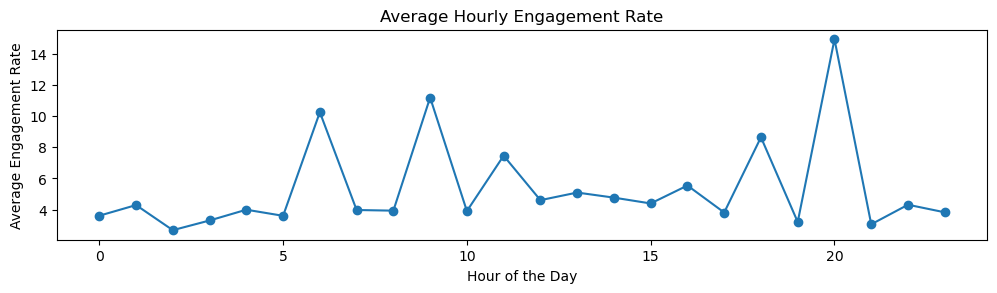

In [39]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_engagement.plot(kind='line', marker='o')
plt.title('Average Hourly Engagement Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')

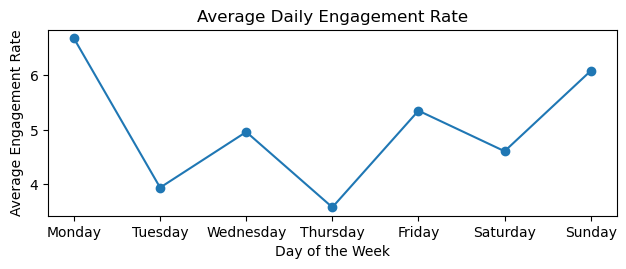

In [40]:
# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_engagement.index = days
daily_engagement.plot(kind='line', marker='o')
plt.title('Average Daily Engagement Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')

plt.tight_layout()
plt.show()

In [41]:
hourly_Impression = fb_new.groupby('Hour')['Impressions'].mean()
daily_Impression = fb_new.groupby('Day of week')['Impressions'].mean()

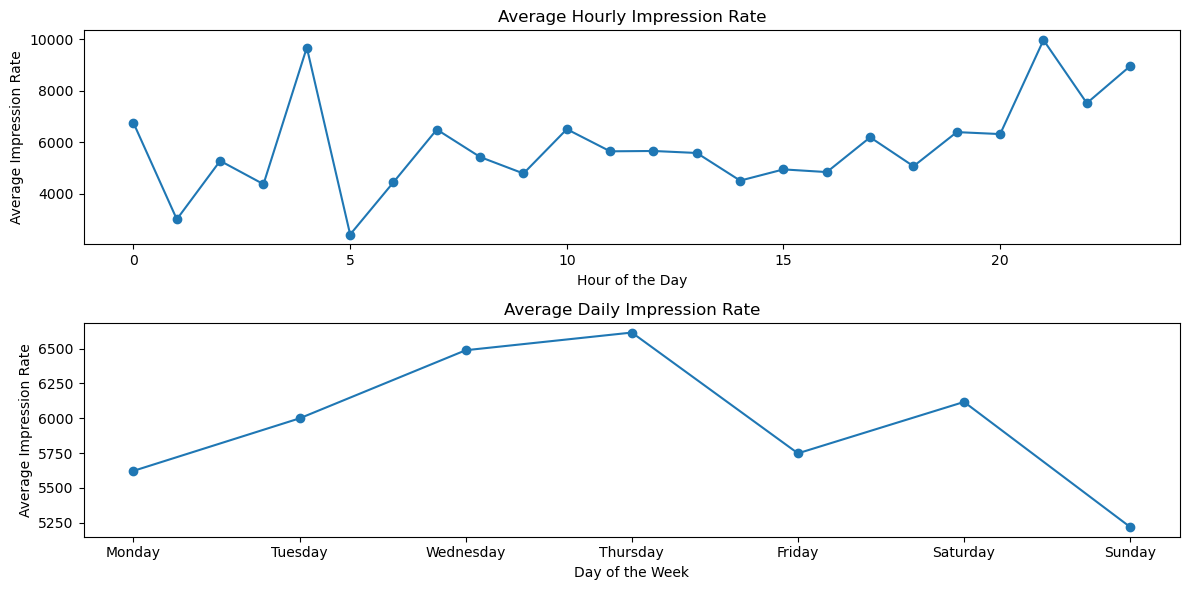

In [42]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_Impression.plot(kind='line', marker='o')
plt.title('Average Hourly Impression Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Impression Rate')

# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_Impression.index = days
daily_Impression.plot(kind='line', marker='o')
plt.title('Average Daily Impression Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Impression Rate')

plt.tight_layout()
plt.show()

In [44]:
content_type_groups = fb_new.groupby(['Content Type', fb_new['Hour']])
engagement_by_content_type = content_type_groups['Engagements'].mean().unstack().T


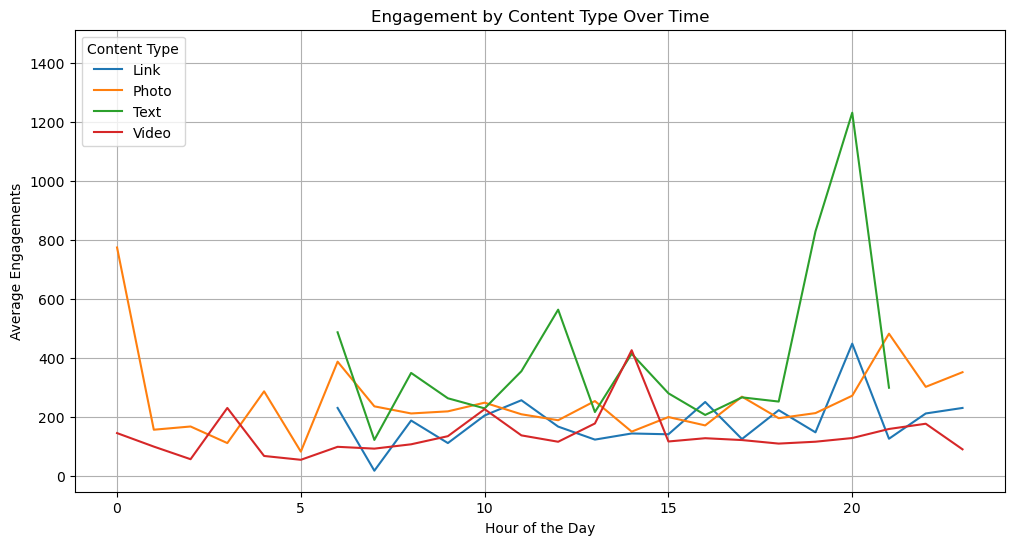

In [45]:

engagement_by_content_type.plot(kind='line', figsize=(12, 6))
plt.title('Engagement by Content Type Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.legend(title='Content Type', loc='upper left')
plt.grid(True)
plt.show()


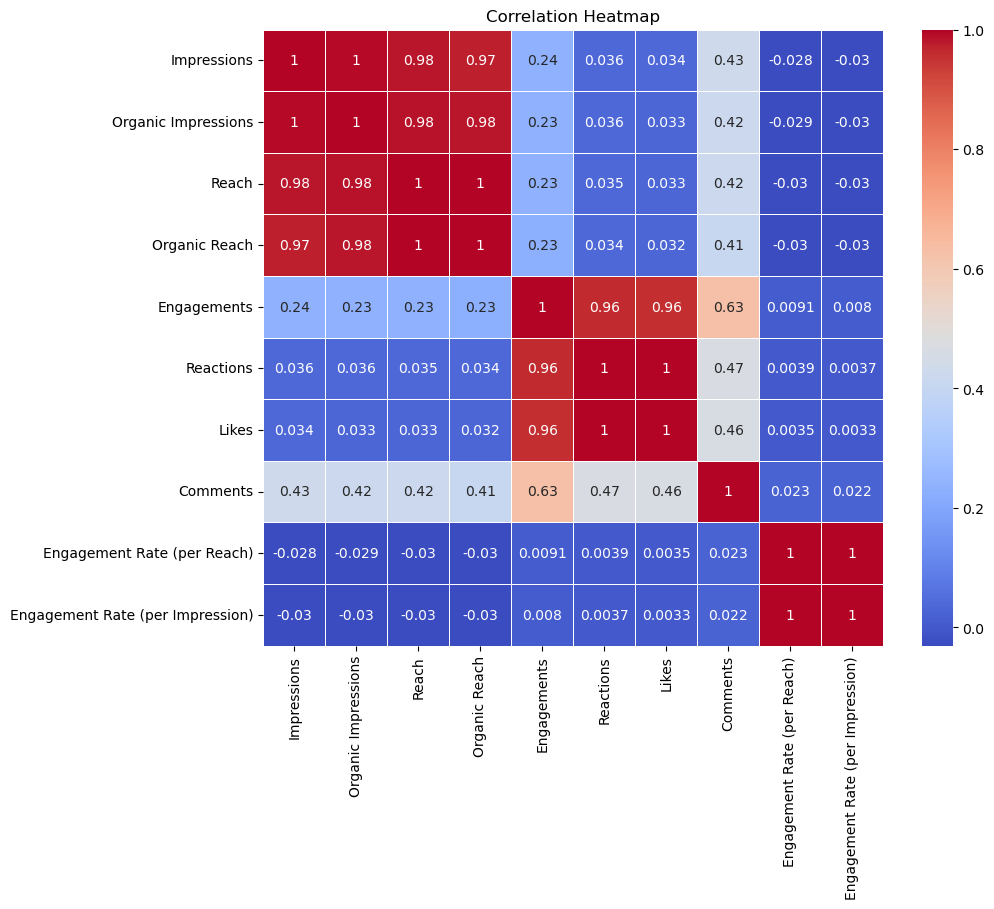

In [46]:
column_to_corr=['Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Engagement Rate (per Reach)','Engagement Rate (per Impression)']

# Create a correlation matrix
corr_matrix = fb_new[column_to_corr].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()